# DLP-based cryptosystem

## 0. Lí thuyết nhóm
Cho $G \neq \emptyset$, định nghĩa phép toán $\cdot: G \times G \rightarrow G$

$(G, \cdot)$ là một nhóm (Group) nếu:
1. $\exists e \in G: e\cdot a = a\cdot e = a, \forall a \in G$
2. $\exists a, e \in G: \exists a^{-1} \in G: a \cdot a^{-1} = a^{-1} \cdot a = e$
3. $\forall a, b, c \in G: (a \cdot b) \cdot c = a \cdot (b \cdot c)$

$G$ là nhóm giao hoán (Nhóm Abel) nếu thỏa thêm điều kiện
4. $\forall a, b \in G: a\cdot b = b\cdot a$


## 1. DLP - discrete logarithm problem
Cho $g \in G \equiv \mathbb{Z}^{*}_p, x \in \mathbb{Z}, y \equiv g^x \pmod{p}$. Khi đó bài toán tìm $x$ là một bài toán DLP.

## 2. Phần tử sinh của nhóm
Ví dụ: Xét nhóm $(\mathbb{Z}^{*}_7, \cdot_7)$ (tạm hiểu $\cdot_7$ là phép mũ $7^x \forall x \in \mathbb{Z}^{*}_7$)

Với $2 \in \mathbb{Z}^{*}_7$, tập các giá trị có thể có là $\{1, 2, 4\}$:
- $2^0 \equiv 1 \pmod 7$
- $2^1 \equiv 2 \pmod 7$
- $2^2 \equiv 4 \pmod 7$
- $2^3 \equiv 1 \pmod 7$ (quay lại ban đầu)
..

Với 3 thì khác, tập giá trị có thể có là $\{1, .., 6\}$. 

Gọi $\text{Ord}(g)$ là bậc của $g \in G$. Đặt $|G| = n$, nếu $\text{Ord}(g) = n - 1$ thì $g$ là một phần tử sinh của $G$.

Thuật toán phía dưới tìm nhanh các phần tử sinh của $n$.

In [1]:
def naive_generator_list(n):
    result = []
    for i in range(2, n):
        is_generator = True
        power = 1
        generated = []
        while 1:
            m = (i ** power) % n
            if (m not in generated):
                generated.append(m)
            else: break
            power += 1

        if len(generated) != n - 1: is_generator = False

        if is_generator: result.append(i)
    return result

print('Generators of Z_11: ', naive_generator_list(11))
print('Generators of Z_13: ', naive_generator_list(13))
print('Generators of Z_17: ', naive_generator_list(17))

Generators of Z_11:  [2, 6, 7, 8]
Generators of Z_13:  [2, 6, 7, 11]
Generators of Z_17:  [3, 5, 6, 7, 10, 11, 12, 14]


### Một thuật toán tìm nhanh phần tử sinh

Cho $p$ là một số nguyên tố có dạng $p = 2q + 1$ (như ta đã tạo trong RSA) $\Rightarrow (p - 1)$ không phải là một số nguyên tố.

Ta có thể biểu diễn $(p - 1) = s_1^{e_1}s_2^{e_2}..s_m^{e_m} (e_i \geq 1)$. Thuật toán tìm nhanh phần tử sinh được miêu tả như sau:

1. Lấy random một số nguyên $x \in (2, p)$
2. $\forall s_i \in [1, m]$:

   Nếu $x^{\frac{(p - 1)}{s_i}} \equiv 1 \pmod p$ thì $x$ không phải là phần tử sinh của $p$, trở lại bước 1.
3. $x$ là một phần tử sinh, return x.

Thuật toán trình bày bên dưới.

In [7]:
import random
from functools import reduce

def factors(n):
    return set(reduce(list.__add__,
                ([i, n//i] for i in range(1, int(n**0.5) + 1) if n % i == 0)))

def find_random_generator(n):
    while 1:
        x = random.randrange(2, n)
        is_generator = True
        for i in factors(n - 1):
            if i == 1: continue
            k = (n - 1) // i
            if (x ** k) % n == 1:
                is_generator = False
                break
        if is_generator: return x
        
print(find_random_generator(11))
print(find_random_generator(13))
print(find_random_generator(17))

8
2
11


## Key Exchange Protocol (Diffie - Hellman)
Điểm chính: thống nhất 1 bí mật chung giữa người gửi và người nhận.

### Pha 0: Chuẩn bị
1. Tạo ngẫu nhiên $p$ là một số nguyên tố có độ an toàn $\lambda$.
2. Chọn $g$ là một phần tử sinh của $p$.

### Pha 1: Mã hóa & giải mã
- Phía người gửi:
  1. Chọn ngẫu nhiên $x \in (2, p)$.
  2. Tạo khóa $k_A \equiv g^x \pmod p$
  3. Gửi khóa $k_A$ cho người nhận.

- Phía người nhận:
  1. Chọn ngẫu nhiên $y \in (2, p)$.
  2. Tạo khóa $k_B \equiv g^y \pmod p$
  3. Gửi khóa $k_B$ cho người gửi.
  
Khi đó khóa $k$ để mã hóa & giải mã được tính như sau:
$k \equiv k_B^x \equiv k_A^y \pmod p$

#### Ví dụ 1: Mã hóa đối xứng
Phía người gửi tính $c \equiv mk \pmod p$

Phía người nhận tính $m \equiv ck^{-1} \pmod p$

#### Ví dụ 2: Mã hóa bất đối xứng (Elgamal)
Giả sử Alice gửi mã và Bob giải mã, vậy **Bob sẽ là người tạo khóa**.

- Phía người nhận:
  0. Chọn $p, g$ như Pha 0 bên trên.
  1. Chọn ngẫu nhiên $d \in (2, p)$.
  2. Tính khóa mã $e \equiv g^d \pmod p$
  3. Gửi bộ $p, g, e$ cho người gửi.
 
- Phía người gửi:
  0. Nhận $p, g, e$.
  1. Chọn ngẫu nhiên $x \in (2, p)$.
  2. Tính $c_1, c_2$:
    - $c_1 \equiv g^x \pmod p$
    - $c_2 \equiv me^x = mg^{dx} \pmod p$
  3. Gửi $c = (c_1, c_2)$ cho người nhận.
  
  
Người nhận giải mã bằng cách tính $m \equiv (c_1^d)^{-1}c_2 \pmod p$

**Chú ý**: Chọn $p$ quá nhỏ sẽ dẫn đến trường hợp encrypt ra các kí tự bị collision.

# Giải bài toán logarithm rời rạc

Các thuật DLP dựa vào độ khó của bài toán logarithm rời rạc (i.e cho $g, h, p$, tìm $x$ sao cho $g^x \equiv h \pmod p$). Giải bài toán logarithm rời rạc, thường dùng là thuật toán Index Calculus.

## Thuật toán Index Calculus
### 1. B-Smooth
$n \in \mathbb{Z}$ là một số $B$-smooth khi và chỉ khi $\displaystyle n = \prod_{p_i \in \mathbb{P}} p_i (p_i \leq B)$ (với $\mathbb{P}$ là tập các số nguyên tố).

### 2. Thuật toán
Cho $g^x \equiv h \pmod p, g, p$. Tìm $x$?

1. Giải $g^x \equiv l \pmod p\ (l \leq B)$
2. Tìm $k$ sao cho $hg^{-k}$ là một số $B$-smooth

$\displaystyle \iff hg^{-k} = \prod_{p_i \in \mathbb{P}} p_i^{e_{p_i}} \pmod p\ (p_i \leq B) \\ \iff \log_{g}h = k + \sum_{p_i \leq B} e_{p_i} \log_{g} p_i \pmod p $

### 3. Ví dụ
Giải phương trình đồng dư $6^x = 57 \pmod{107}$

1. Chọn $B = 7 \Rightarrow \mathbb{B} = \{2, 3, 5, 7\}$
2. Thử-và-sai nhiều lần:
- Chọn $k = 24 \Rightarrow 6^k \equiv 42 \pmod{107} = 2\times3\times7$
- Chọn $k = 6 \Rightarrow 6^k \equiv 4 \pmod{107} = 2^2$
- Chọn $k = 33 \Rightarrow 6^k \equiv 15 \pmod{107} = 3\times5$
- Chọn $k = 34 \Rightarrow 6^k \equiv 90 \pmod{107} = 2\times3^2\times5$

Điều này tương đương với

$$\begin{cases}
24 \equiv \log_{6}2 + \log_{6}3 + \log_{6}7 \pmod{107}\\
6 \equiv 2\log_{6}2 \pmod{107}\\
33 \equiv \log_{6}3 + \log_{6}5 \pmod{107}\\
34 \equiv \log_{6}2 + 2\log_{6}3 + \log_{6}5 \pmod{107}
\end{cases}$$

Lần lượt đặt $\log_{6}2 = x, \log_{6}3 = y, log_{6}5 = z, \log_{6}7 = t$, ta có hệ 4 phương trình 4 ẩn. Giải hệ phương trình, ta thu được các nghiệm

$$\begin{cases}
\log_{6}2 = 3\\
\log_{6}3 = 104\\
\log_{6}5 = 35\\
\log_{6}7 = 23
\end{cases}$$

(Chú ý đây không phải phép logarit thông thường!)

3. Tiếp tục thử-sai nhiều lần: chọn $u$ sao cho $hg^u$ là một số $B$-smooth

Chọn $u = 57 \Rightarrow hg^u \equiv 35 = 5\times7 \pmod{107} \Rightarrow \log_{6}57 + 38 = \log_{6}5 + \log_{6}7 \Rightarrow x = \log_{6}57 = \log_{6}5 + \log_{6}7 - 38 = 20$.


# Đường cong Elliptic

## Định nghĩa:
Nhóm $(\mathbb{G}, +)$ là nhóm các điểm nằm trên đường cong Elliptic $(E): y^2 = x^3 + ax + b$ với:

- $\mathbb{G} = \{P(x, y) \in (E), \forall x, y \in \mathbb{Z}_p\}$
- $+:\mathbb{G} \times \mathbb{G}\to \mathbb G,\; P + Q\mapsto R $ (Chọn 2 điểm $P, Q \in (E)$, đường thẳng đi qua $P, Q$ cắt $E$ tại điểm thứ 3 là $Z$. Lấy $R$ là đối xứng của $Z$ qua $Ox$).
- Nếu $P$ và $Q$ không cắt $(E)$ ở điểm thứ 3 thì $P + Q = O$ với $O$ là điểm vô cực.

Hình bên dưới là biểu diễn của đường cong Elliptic $(E): y^2 = x^3 - x + 1, P = (1, -1), Q = (0, -1), R = P + Q$.

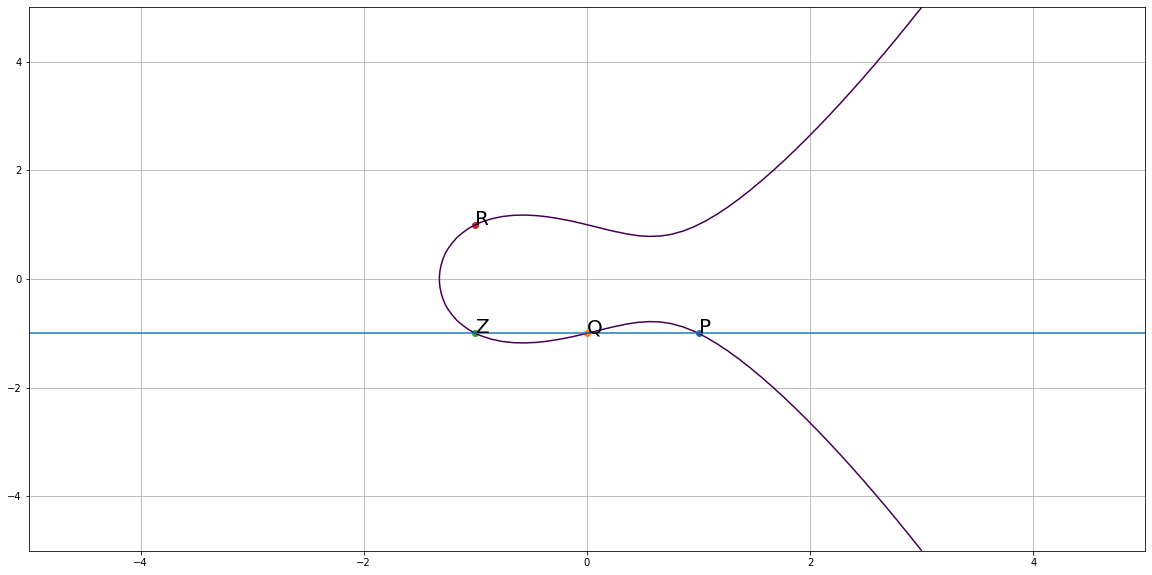

In [36]:
import numpy as np
import matplotlib.pyplot as plt

a = -1
b = 1

y, x = np.ogrid[-5:5:100j, -5:5:100j]

plt.figure(figsize=(20, 10))
plt.contour(x.ravel(), y.ravel(), pow(y, 2) - pow(x, 3) - x * a - b, [0])
plt.grid()

plt.scatter(1, -1)
plt.annotate('P', (1, -1), size = 20)
plt.scatter(0, -1)
plt.annotate('Q', (0, -1), size = 20)
plt.axhline(y = -1)

plt.scatter(-1, -1)
plt.annotate('Z', (-1, -1), size = 20)

plt.scatter(-1, 1)
plt.annotate('R', (-1, 1), size = 20)

plt.show()

## Hệ mã ECC (Elliptic Curve Cryptosystem)

0. Chọn $p \in \mathbb{P}$ và $(E)$ là một đường cong Elliptic; Chọn $G \in (E)$.
1. Chọn $d$ ngẫu nhiên, $e = dG = G + G + .. + G$ ($d$ lần).
2. Pha mã hóa: chọn $y$ ngẫu nhiên, $c_1 = yG, c_2 = M + ye$ ($M$ là tin cần mã hóa).
3. Pha giải mã: $M = c_2 - dc_1$.